In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [15]:
info_gain_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(info gain).pcap_ISCX.csv')
anova_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(anova).pcap_ISCX.csv')
traffic_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Processed-Traffic(only cleaned).pcap_ISCX.csv')


In [16]:
def evaluate_model(df, model):
    y_df = LabelEncoder().fit_transform(df.iloc[:, -1])
    x_df = df.iloc[:, :-1]

    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, x_df, y_df, scoring='accuracy', cv=cv, n_jobs=-1)

    return np.mean(scores)


data = list()

dfs = [traffic_df, anova_df, info_gain_df]

rf = RandomForestClassifier(n_estimators=100)
nb = GaussianNB()
bn = BernoulliNB(alpha=1.0)
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
cart = DecisionTreeClassifier()

# models = [neigh, rf, nb, cart]
models = [ rf, nb, bn, ada, cart]

for model in models:
    model_trials = list()
    for df in dfs:
        # round numbers (4 digits after the decimal point)
        rounded = np.around(evaluate_model(df, model), 4)
        model_trials.append(rounded)
    data.append(model_trials)

print(data)


[[0.9965, 0.991, 0.997], [0.4321, 0.681, 0.4137], [0.4518, 0.5071, 0.4267], [0.4407, 0.4628, 0.4407], [0.9951, 0.9872, 0.9953]]


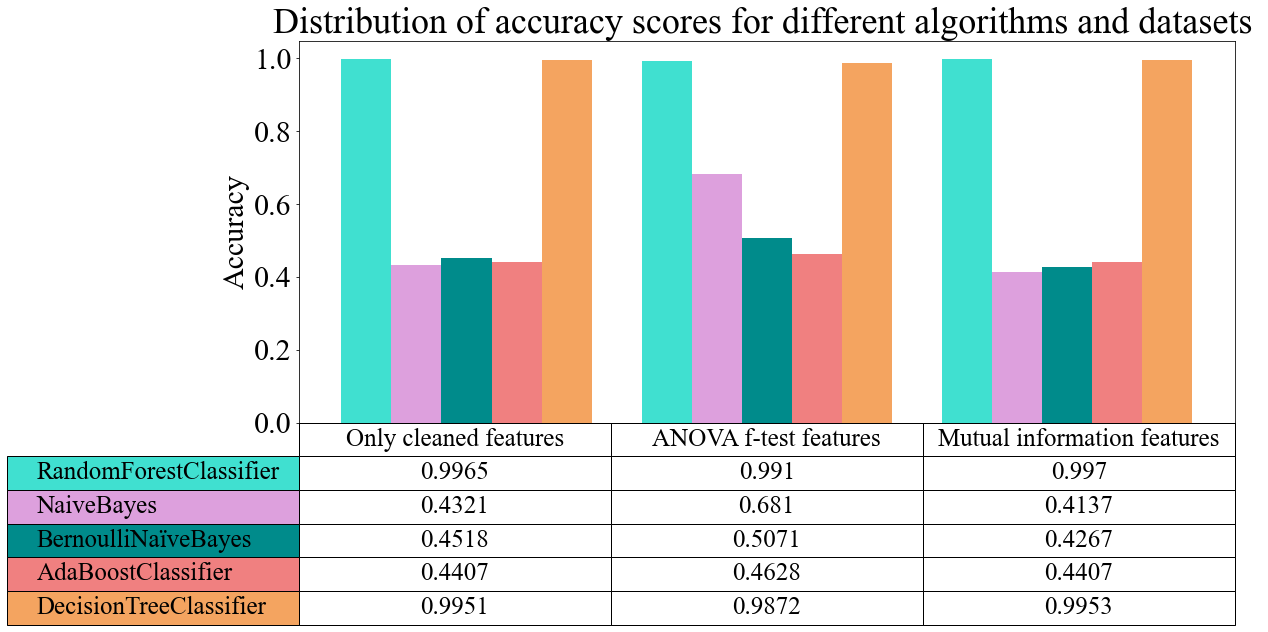

In [17]:
font = {'family': 'Times New Roman', 'weight': 'book', 'size': 30}
plt.rc('font', **font)
plt.figure(num=None, figsize=(20, 10))

y_pos = np.array([0, 1.2, 2.4])
width = 0.2

columns = ('Only cleaned features', 'ANOVA f-test features', 'Mutual information features')
# rows = ['KNeighborsClassifier', 'RandomForestClassifier', 'Naive Bayes',
#         'DecisionTreeClassifier']
rows = ['RandomForestClassifier', 'NaiveBayes', 'BernoulliNaïveBayes', 'AdaBoostClassifier',
        'DecisionTreeClassifier']
colors = ['turquoise', 'plum', 'darkcyan', 'lightcoral', 'sandybrown']
n_rows = len(data)

cell_text = []
offset = 0
for row in range(n_rows):
    plt.bar(y_pos + offset, data[row], width, color=colors[row])
    offset += width
    cell_text.append(data[row])


# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom')
the_table.scale(1, 4)
the_table.auto_set_font_size(False)
the_table.set_fontsize(25)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.25, bottom=0.35)

plt.ylabel('Accuracy', fontsize=30)
plt.xticks([])
plt.title('Distribution of accuracy scores for different algorithms and datasets ')

plt.show()